<Axes: >

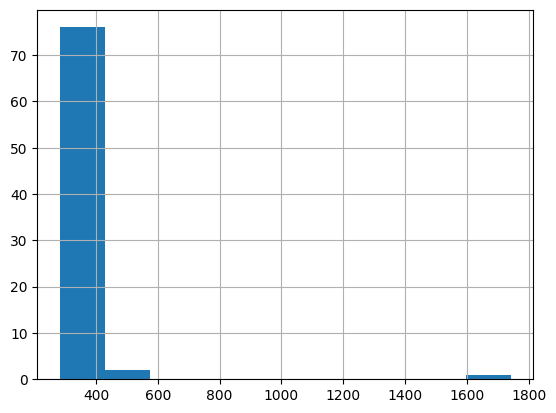

In [63]:
import tiktoken
import os
import pandas as pd

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped_1.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [64]:
import pandas as pd
df.head()

,title,text,n_tokens
0,cards ace of cups,Ace of Cups Tarot Card Meaning Free Taro...,291
1,cards page of wands,Page of Wands Tarot Card Meaning Free Ta...,283
2,cards six of pentacles,Six of Pentacles Tarot Card Meaning Free...,324
3,cards the star,The Star Tarot Card Meaning Free Tarot R...,297
4,cards queen of swords,Queen of Swords Tarot Card Meaning Free ...,330


In [28]:
# Create questions based on the context
import openai

def get_questions(context):
    try:
        response = openai.Completion.create(
            engine="davinci-instruct-beta-v3",
            prompt=f"Write three questions about people based on the tarot cards below\n\nText: {context}\n\nQuestions:\n1.",
            temperature=0,
            max_tokens=257,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=["\n\n"]
        )
        return response['choices'][0]['text']
    except:
        return ""

df['questions']= df.text.apply(get_questions)
df['questions'] = "1." + df.questions
print(df[['questions']].values[0][0])

1. What is the Ace of Cups tarot card associated with?
2. What does the Ace of Cups tarot card represent?
3. What are some of the things the Ace of Cups tarot card predicts?


In [29]:
df.head()
# df = df.drop(columns=['context'])
df.to_csv('processed/scraped_q.csv')

In [62]:
# Create answers based on the context
def get_answers(row):
    try:
        response = openai.Completion.create(
            engine="davinci-instruct-beta-v3",
            prompt=f"Write answer based on the text below\n\nText: {row.text}\n\nQuestions:\n{row.questions}\n\nAnswers:\n1.",
            temperature=0,
            max_tokens=256,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0
        )
        return response['choices'][0]['text']
    except Exception as e:
        print (e)
        return ""


df['answers']= df.apply(get_answers, axis=1)
df['answers'] = "1." + df.answers
df = df.dropna().reset_index().drop('index',axis=1)
print(df[['answers']].values[0][0])

'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'
'Series' object has no attribute 'text'


In [60]:
df.head()
# df = df.drop(columns=['context'])
df.to_csv('processed/scraped_qa.csv',  index=False)

In [61]:
df.head()

,prompt,completion
0,Ace of Cups Tarot Card Meaning Free Taro...,1. The Ace of Cups tarot card is associated w...
1,Ace of Cups Tarot Card Meaning Free Taro...,The Ace of Cups tarot card represents the beg...
2,Ace of Cups Tarot Card Meaning Free Taro...,The Ace of Cups tarot card predicts success a...
3,Page of Wands Tarot Card Meaning Free Ta...,1. The Page of Wands is energetic and active ...
4,Page of Wands Tarot Card Meaning Free Ta...,The Page of Wands in relation to the question...


In [34]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df), len(test_df)

(63, 16)

In [37]:
df.text.str.contains('->').sum()

0

In [47]:
df_fake = df
rows = []
for i, row in df_fake.iterrows():
    for q, a in zip(("1." + row.questions).split('\n'), ("1." + row.answers).split('\n')):
        if len(q) >10 and len(a) >10:
                rows.append({"prompt":f"{row.text}\n###\nQuestion: {q[2:].strip()}\n###\n", "completion":f" {a[2:].strip()}"})
        
rows[0]

{'prompt': "  Ace of Cups Tarot Card Meaning     Free Tarot Reading  Menu Tarot Card Meanings Tarot Cards Love Tarot Daily Tarot Reading Tarot Horoscope Biorhythms I Ching Runes Spirit Guides Tarot App Live Tarot Reading Log in   Ace of Cups Abundance · Creativity · Intense relationship · Satisfaction · Success Ace of Cups Tarot card Ace of Cups's Meaning The Ace of Cups signifies the beginning of period of strong emotional health for you. Expect copious joy, happiness, and love to surround you during this time. Existing personal relationships may strengthen, meaningful new ones are likely to form. If marriage is in your future, you are likely to lay the foundations for it during this time. Past There have been numerous occasions that prove your creative talent and ability to succeed in your efforts. By being passionate and intensely focused, you have allowed for greater productivity. Present Good news is going to bring joy and extreme satisfaction to your life. Future The difficulties

In [48]:
rows[1]

{'prompt': "  Ace of Cups Tarot Card Meaning     Free Tarot Reading  Menu Tarot Card Meanings Tarot Cards Love Tarot Daily Tarot Reading Tarot Horoscope Biorhythms I Ching Runes Spirit Guides Tarot App Live Tarot Reading Log in   Ace of Cups Abundance · Creativity · Intense relationship · Satisfaction · Success Ace of Cups Tarot card Ace of Cups's Meaning The Ace of Cups signifies the beginning of period of strong emotional health for you. Expect copious joy, happiness, and love to surround you during this time. Existing personal relationships may strengthen, meaningful new ones are likely to form. If marriage is in your future, you are likely to lay the foundations for it during this time. Past There have been numerous occasions that prove your creative talent and ability to succeed in your efforts. By being passionate and intensely focused, you have allowed for greater productivity. Present Good news is going to bring joy and extreme satisfaction to your life. Future The difficulties

In [54]:
len(rows)

233

In [55]:
df = pd.DataFrame(rows)
df.to_csv('processed/scraped_train.csv',index=False)
df.head()

,prompt,completion
0,Ace of Cups Tarot Card Meaning Free Taro...,1. The Ace of Cups tarot card is associated w...
1,Ace of Cups Tarot Card Meaning Free Taro...,The Ace of Cups tarot card represents the beg...
2,Ace of Cups Tarot Card Meaning Free Taro...,The Ace of Cups tarot card predicts success a...
3,Page of Wands Tarot Card Meaning Free Ta...,1. The Page of Wands is energetic and active ...
4,Page of Wands Tarot Card Meaning Free Ta...,The Page of Wands in relation to the question...


In [58]:
df.to_json('train/tarot_qa_scraped_train.jsonl', orient='records', lines=True)

In [59]:
!openai tools fine_tunes.prepare_data -f train/tarot_qa_scraped_train.jsonl

Analyzing...

- Your file contains 233 prompt-completion pairs
- All prompts end with suffix `\n##\nAnswer:`. This suffix seems very long. Consider replacing with a shorter suffix, such as `\n\n###\n\n`
- All prompts start with prefix `  `
- All completions end with suffix `.`

No remediations found.

You can use your file for fine-tuning:
> openai api fine_tunes.create -t "train/tarot_qa_scraped_train.jsonl"

After you’ve fine-tuned a model, remember that your prompt has to end with the indicator string `\n##\nAnswer:` for the model to start generating completions, rather than continuing with the prompt. Make sure to include `stop=["."]` so that the generated texts ends at the expected place.
Once your model starts training, it'll approximately take 5.64 minutes to train a `curie` model, and less for `ada` and `babbage`. Queue will approximately take half an hour per job ahead of you.
